## Predicting the Compressive Strength of Different Samples of Concrete with Keras Library

## Predicting the Compressive Strength of Different Samples of Concrete with Keras Library

In [1]:
# Registration number: may22/comp/1423x
# Fullname: Ciniso Msibi
# Msc Comp. SC

Import necessary libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
df.shape

(1030, 9)

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [9]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Separating predictors and target

In [10]:
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Strength']] # all columns except Strength
target = df['Strength']

In [11]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [12]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

## Normalization of the Data

In [13]:
predictors_norm = (predictors - predictors.mean()) / predictors.std() # substract  the mean and divide by standard deviation
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [14]:
n_cols = predictors_norm.shape[1] 

Import the Keras library

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Build a Neural Network

In [16]:
def regression_model(): # define regression model
    # create model with three hidden layers, each of 10 hidden units.
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Take 30% of the data set for Testing the accuracy of the model and 70% for training the model

In [17]:
from sklearn.model_selection import train_test_split # import the packages for training, testing and spliting from sklearn
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42)

### Train and Test the Network

In [18]:
# build the model
model = regression_model()
# fit the model
epochs = 50 # increase the number of epochs to 100
model.fit(X_train, y_train, epochs=epochs, verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 1591.3074
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 1577.6276
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 1556.0140
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 1517.3800
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 1454.2782
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 1354.8092
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 1202.6927
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 993.8376
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 744.9295
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 499.1819
Epoch 11/50
23/23 [==============================] - 0s 2ms/step - loss: 337.7278
Epoch 12/50
23/23 [==============================] - 0s 2ms/step - loss: 270.1398
Epoch 13/50
23/23 

## Assignment : Plot a graph of loss (mse) Vs epoch

In [19]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

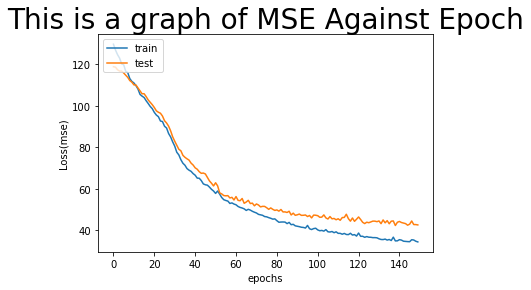

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('This is a graph of MSE Against Epoch',fontsize=28)
plt.xlabel('epochs')
plt.ylabel('Loss(mse)')


plt.show()

## Evaluating the Model

In [21]:
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

10/10 [==============================] - 0s 2ms/step


46.12860107421875

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

46.12860354970317 0.0


In [27]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 17.817914962768555
10/10 [==============================] - 0s 2ms/step
MSE 2: 17.787796020507812
10/10 [==============================] - 0s 2ms/step
MSE 3: 19.831527709960938
10/10 [==============================] - 0s 2ms/step
MSE 4: 19.379735946655273
10/10 [==============================] - 0s 2ms/step
MSE 5: 16.42015838623047
10/10 [==============================] - 0s 1ms/step
MSE 6: 17.247106552124023
10/10 [==============================] - 0s 2ms/step
MSE 7: 19.080028533935547
10/10 [==============================] - 0s 4ms/step
MSE 8: 16.791746139526367
10/10 [==============================] - 0s 2ms/step
MSE 9: 18.651145935058594
10/10 [==============================] - 0s 2ms/step
MSE 10: 21.289052963256836
10/10 [==============================] - 0s 2ms/step
MSE 11: 15.982340812683105
10/10 [==============================] - 0s 2ms/step
MSE 12: 16.266822814941406
10/10 [==============================] - 0s 2ms/step
MSE 13: 18.416080474853516
10/10 [================

In [28]:
from sklearn.metrics import r2_score

In [29]:
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

R2-score: 0.92


## Conclusion

The average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.
Thus, the risk function keep varying with different values in the datacset.

How to actually avoid overfitting through the experiments conducted we can safely say that there is no optimal number of epochs. Actually, the number of epochs differ 
from one dataset to other the main factor which comes into the picture is the training and validation error.

When 10 nodes with 3 hidden layers, one output layer with 50 epochs were used, the ANN regression model has R-square value of 0.92 which is 92% accurate.